Import the data

In [1]:
import numpy as np
import pandas as pd
import datetime
import datetime

filepath = "/content/etsy_04-03_Top10000 v2.csv"
df = pd.read_csv(filepath, encoding="ISO-8859-1")

def date(x):
  return datetime.datetime.fromtimestamp(x)

df["shop_create_date"] = df["shop_create_date"].apply(date)
df["shop_update_date"] = df["shop_update_date"].apply(date)



In what period are most shops created?

In [2]:
amount = df.groupby(df["shop_create_date"].dt.year)["shop_id"].count()
most = df.groupby(df["shop_create_date"].dt.year)["shop_id"].count().max()

print(amount)

shop_create_date
2010    1595
2011     747
2012     861
2013     926
2014    1065
2015    1096
2016     901
2017     828
2018     720
2019     591
2020     598
2021      72
Name: shop_id, dtype: int64


Min and max date

In [3]:
min_date = df["shop_create_date"].min()
max_date = df["shop_create_date"].max()

print(min_date)
print(max_date)

2010-09-03 20:27:42
2021-11-11 13:58:45


What is the average sales per day per shop since they have been created?

In [4]:
def calculate_average_sales(df):
    average_sales = df["sold_count"].mean()
    return average_sales

calculate_average_sales(df)

53484.1924

Line graph of Etsy Shop Sales.

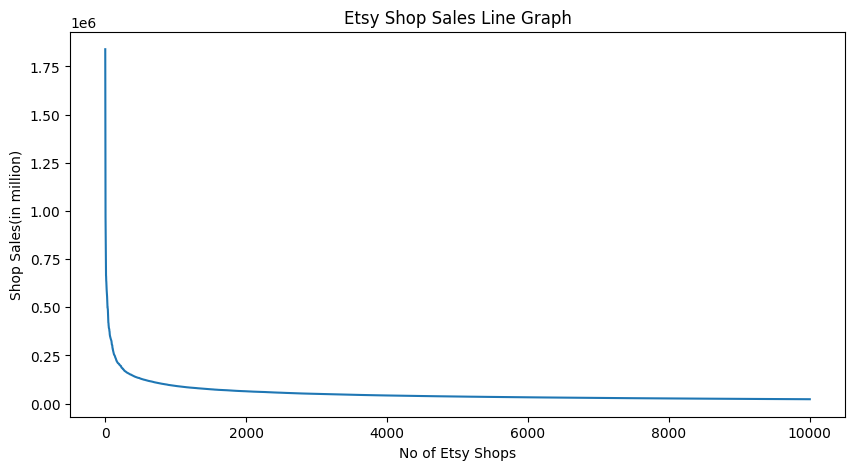

In [5]:
   import matplotlib.pyplot as plt

   y = df['sold_count']

   plt.figure(figsize = (10, 5))
   plt.ylabel('Shop Sales(in million)')
   plt.xlabel('No of Etsy Shops')
   plt.title('Etsy Shop Sales Line Graph')
   plt.plot(y)

   plt.show()

What is the median sales per day per shop since they have been created?

In [6]:
median_sales = df["sold_count"].median()
print("The median sales value is : ",median_sales)

The median sales value is :  36750.0


Boxplot of Sales Data

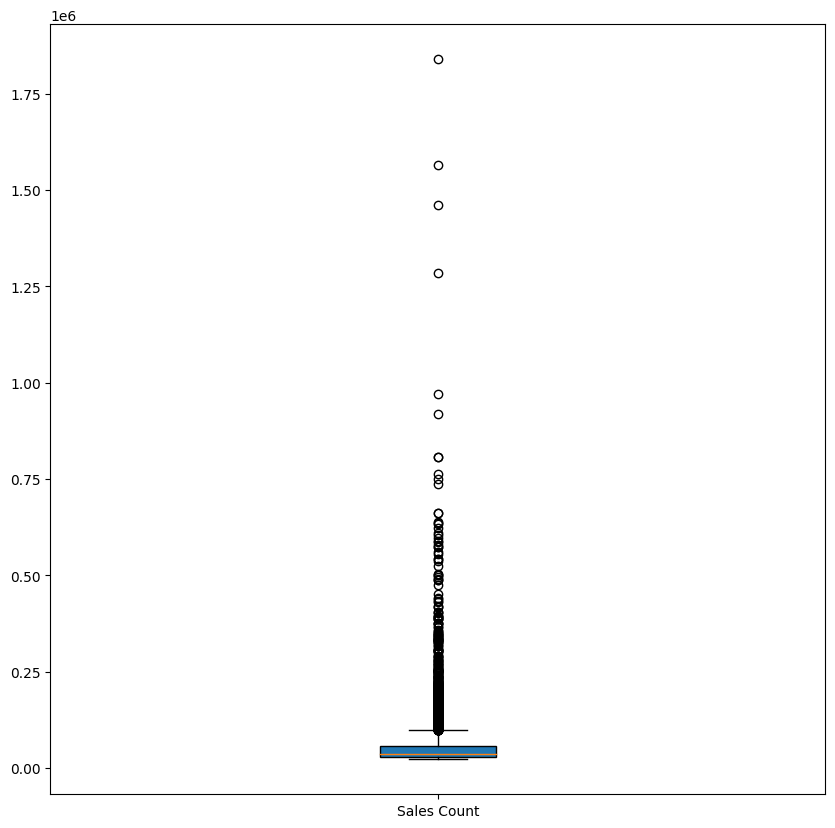

In [7]:
import matplotlib.pyplot as plt
import numpy as np

data = df["sold_count"]

fig = plt.figure(figsize =(10, 10))

# Creating plot
plt.boxplot(data,patch_artist = True,labels = ['Sales Count'])

# show plot
plt.show()

What is the average total rating count ?

In [8]:
avg_total_rating = df["total_rating_count"].mean()
print("The mean total rating count is : ",avg_total_rating)

The mean total rating count is :  8471.4734


Line Graph of Total Rating Count Data

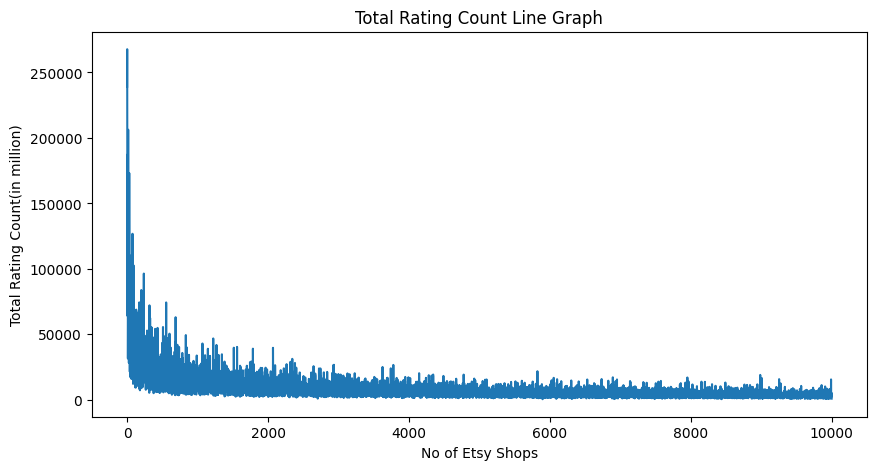

In [9]:
   import matplotlib.pyplot as plt

   y = df['total_rating_count']

   plt.figure(figsize = (10, 5))
   plt.ylabel('Total Rating Count(in million)')
   plt.xlabel('No of Etsy Shops')
   plt.title('Total Rating Count Line Graph')
   plt.plot(y)

   plt.show()

What is the median Total Rating Count per day per shop since they have been created?

In [10]:
median_sales = df["total_rating_count"].median()
print("The median total rating count is : ",median_sales)

The median total rating count is :  5871.0


Box plot of Total Rating Count Data ?

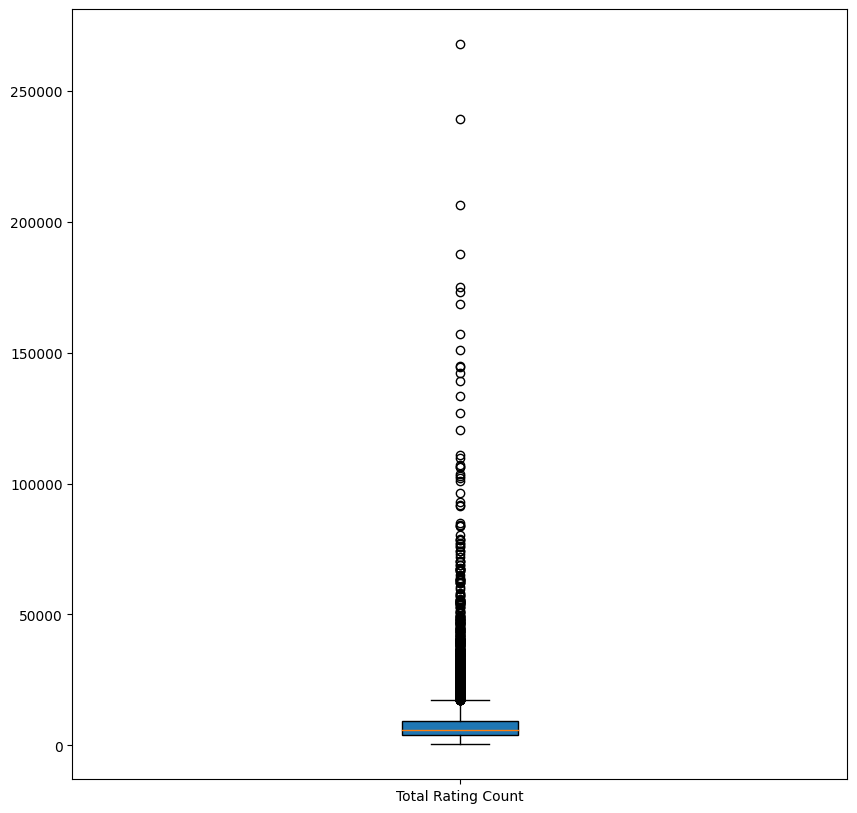

In [11]:
import matplotlib.pyplot as plt
import numpy as np

data2 = df["total_rating_count"]

fig = plt.figure(figsize =(10, 10))

# Creating plot
plt.boxplot(data2,patch_artist = True,labels = ['Total Rating Count'])

# show plot
plt.show()

What is the relation between the average rating and the number of sales?

In [12]:
relation = df['sold_count'].corr(df['average_rating'])
print(round(relation,3))

0.022


Shops in which country have the most sales?

In [13]:
country_sales = df.groupby("country_code")["sold_count"].sum()
max_sales_country = country_sales.idxmax()
print(max_sales_country)

US


Which country code is included most to ship to?

In [14]:
def best_country_code(df):
    sales_by_country = df.groupby('country_code')['sold_count'].sum()
    best_country_code = sales_by_country.idxmax()
    return best_country_code

best_country_code(df)

'US'

What is the relation between the favourite count and the number of sales?

In [15]:
def find_correlation(df):
    correlation = df["favorites_count"].corr(df["sold_count"])
    return correlation

find_correlation(df)

0.4794027255430284

Does (minimum) free shipping increase the number of sales?

In [16]:
curr_pos = 0
sum_true_min_shipping = 0
sum_false_min_shipping = 0
min_free_shipping_present = df[(df["has_min_free_shipping"] == 1)]
min_free_shipping_absent = df[(df["has_min_free_shipping"] == 0)]
count_min_free_shipping_present = len(min_free_shipping_present)
count_min_free_shipping_absent = len(min_free_shipping_absent)
Dataset_min_shipping = df["has_min_free_shipping"]
Dataset_sales = df["sold_count"]

while curr_pos < 10000 :

    if Dataset_min_shipping[curr_pos] == 1 :
        sum_true_min_shipping = sum_true_min_shipping + Dataset_sales[curr_pos]
    elif Dataset_min_shipping[curr_pos] == 0 :
          sum_false_min_shipping = sum_false_min_shipping + Dataset_sales[curr_pos]

    curr_pos = curr_pos + 1

print("The average no of sales with min free shipping is : ", sum_true_min_shipping/count_min_free_shipping_present)
print("The average no of sales without min free shipping is : ", sum_false_min_shipping/count_min_free_shipping_absent)

The average no of sales with min free shipping is :  58717.7127692788
The average no of sales without min free shipping is :  51472.54288917959


Does free shipping increase the number of sales?

In [17]:
curr_pos = 0
sum_true_free_shipping = 0
sum_false_free_shipping = 0
free_shipping_present = df[(df["has_free_shipping"] == 1)]
free_shipping_absent = df[(df["has_free_shipping"] == 0)]
count_shipping_present = len(free_shipping_present)
count_shipping_absent = len(free_shipping_absent)
Dataset_shipping = df["has_free_shipping"]
Dataset_sales = df["sold_count"]

while curr_pos < 10000 :

    if Dataset_shipping[curr_pos] == 1 :
        sum_true_free_shipping = sum_true_free_shipping + Dataset_sales[curr_pos]
    elif Dataset_shipping[curr_pos] == 0 :
          sum_false_free_shipping = sum_false_free_shipping + Dataset_sales[curr_pos]

    curr_pos = curr_pos + 1

print("The average no of sales with free shipping is : ", sum_true_free_shipping/count_shipping_present)
print("The average no of sales without free shipping is : ", sum_false_free_shipping/count_shipping_absent)

The average no of sales with free shipping is :  55308.58086431402
The average no of sales without free shipping is :  52357.063287250385


Does the payment method have an affect on the number of sales?

In [18]:
payment_effect = df.groupby("accepts_direct_checkout")["sold_count"].sum()

print("Sales count by payment method:")
print(payment_effect)


Sales count by payment method:
accepts_direct_checkout
False     31497972
True     503343952
Name: sold_count, dtype: int64


Is there a relationship between the number of countries to ship to and the number of sales of a shop?

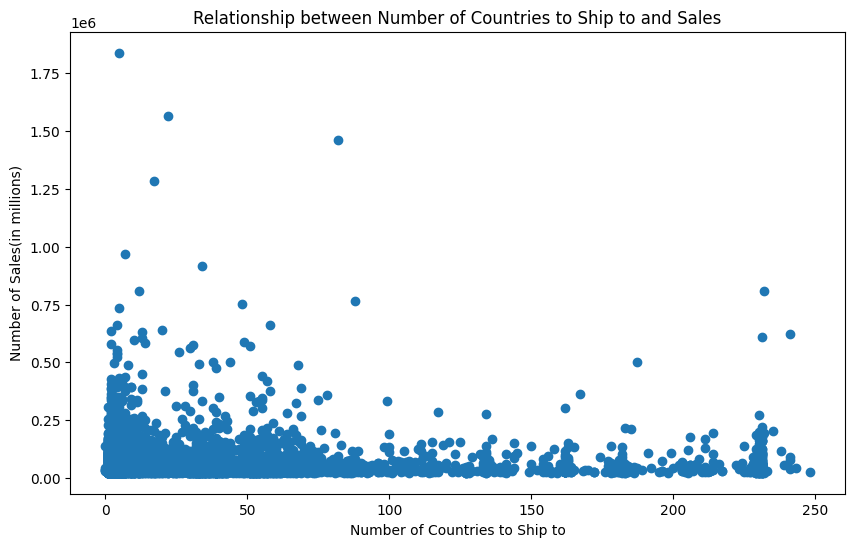

In [19]:
import matplotlib.pyplot as plt

# Calculate the number of countries to ship to
df['num_countries'] = df['ships_to_country_ids'].apply(lambda x: len(eval(x)))

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(df['num_countries'], df['sold_count'])
plt.xlabel('Number of Countries to Ship to')
plt.ylabel('Number of Sales(in millions)')
plt.title('Relationship between Number of Countries to Ship to and Sales')
plt.show()


Does additional customization increase sales?

In [20]:
customization_effect = df.groupby("additional_customization")["sold_count"].sum()

print("Sales count by additional customization:")
print(customization_effect)


Sales count by additional customization:
additional_customization
False    243855162
True     290986762
Name: sold_count, dtype: int64


Can you fit one or more relevant regression models for this dataset?

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

dz = df[["sold_count","total_rating_count"]]
dz["total_rating_count^2"] = dz["total_rating_count"] ** 2

<ipython-input-21-2c6d63fc3b37>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dz["total_rating_count^2"] = dz["total_rating_count"] ** 2


In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = dz[["total_rating_count","total_rating_count^2"]]
y = dz["sold_count"]

model.fit(X, y)

dz['preds2'] = model.predict(dz[["total_rating_count","total_rating_count^2"]])

lossfunc = np.mean(abs(dz['sold_count'] - dz['preds2']))

print(f"theta0: {model.intercept_}")
print(f"theta1 and theta2: {model.coef_}")
print(f"The loss function is : {lossfunc:.2f} ")

theta0: 16347.753090461818
theta1 and theta2: [4.28506502e+00 4.38722526e-06]
The loss function is : 16681.68 


<ipython-input-22-a8a397102d5a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dz['preds2'] = model.predict(dz[["total_rating_count","total_rating_count^2"]])


In [23]:
import plotly.graph_objects as go

scatter_plot = px.scatter(dz, x="total_rating_count", y="sold_count")
line_plot = px.line(dz.sort_values(["total_rating_count"]), x="total_rating_count", y="preds2")
line_plot.update_traces(line=dict(color = 'rgba(255, 0, 0)'))

go.Figure(data=scatter_plot.data + line_plot.data)

In [24]:
rmse2 = np.sqrt(np.mean((dz['sold_count'] - dz['preds2']) ** 2))
print(f"RMSE for multiple linear regression with squared features: {rmse2:.2f}")

RMSE for multiple linear regression with squared features: 34155.37


Can you fit one or more classification/clustering relevant regression models to the data ?

In [25]:
tot_rating_count = df['total_rating_count']
upper_threshold = tot_rating_count.mean()
lower_threshold = 0.5*tot_rating_count.mean()

high_rated_shops = []
avg_rated_shops = []
low_rated_shops = []

curr_pos = 0

for shop in tot_rating_count:
    if tot_rating_count[curr_pos] > upper_threshold :
        high_rated_shops.append(shop)
    elif tot_rating_count[curr_pos] < lower_threshold :
        low_rated_shops.append(shop)
    else :
        avg_rated_shops.append(shop)

    curr_pos = curr_pos + 1

print("The probability of a shop having high no of ratings is: ", len(high_rated_shops)/len(tot_rating_count))
print("This probability of a shop having low no of ratings is: ", len(low_rated_shops)/len(tot_rating_count))
print("This probability of a shop having avg no of ratings is: ", len(avg_rated_shops)/len(tot_rating_count))

The probability of a shop having high no of ratings is:  0.2944
This probability of a shop having low no of ratings is:  0.2979
This probability of a shop having avg no of ratings is:  0.4077


Total Rating Count Breakdown

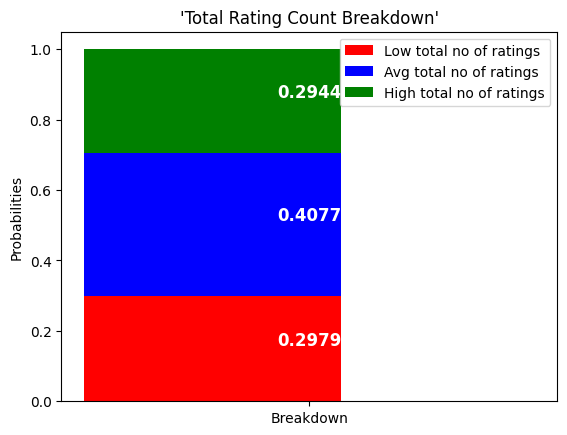

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# create data
x = ["Breakdown"]
y1 = np.array([0.2979])
y2 = np.array([0.4077])
y3 = np.array([0.2944])

# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='g')

for patch in plt.gca().patches:
    patch.set_width(patch.get_width() * 0.57)

plt.ylabel("Probabilities")
plt.legend(["Low total no of ratings", "Avg total no of ratings", "High total no of ratings"])
plt.title("'Total Rating Count Breakdown'")

# Add text annotations
plt.text(x[0], y1[0] / 2, "%.4f" % y1[0], ha="center", va="bottom", color="white", fontsize=12, fontweight="bold")
plt.text(x[0], y1[0] + y2[0] / 2, "%.4f" % y2[0], ha="center", va="bottom", color="white", fontsize=12, fontweight="bold")
plt.text(x[0], y1[0] + y2[0] + y3[0] / 2, "%.4f" % y3[0], ha="center", va="bottom", color="white", fontsize=12, fontweight="bold")


plt.show()

Data Correlation Heatmap

<ipython-input-27-717315c8ee97>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



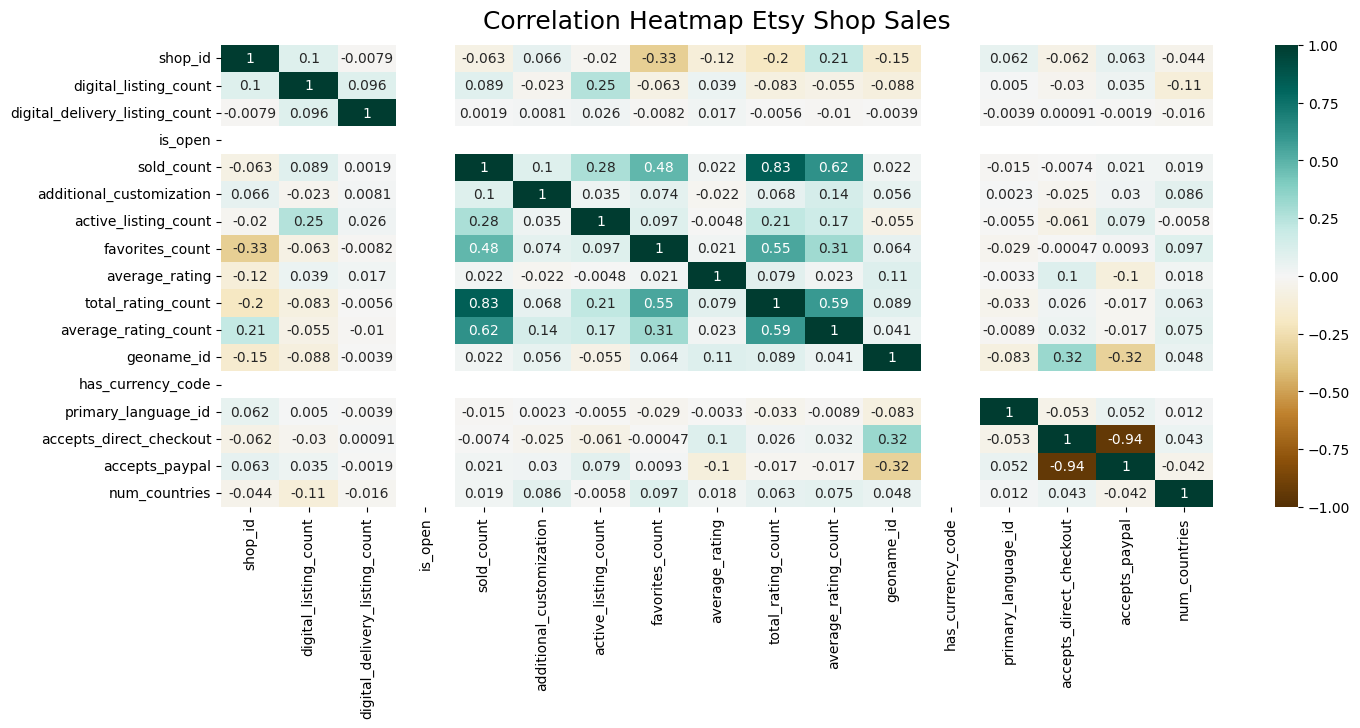

In [27]:
import seaborn as sns

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap Etsy Shop Sales', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In what period have shops been created line and bar graph

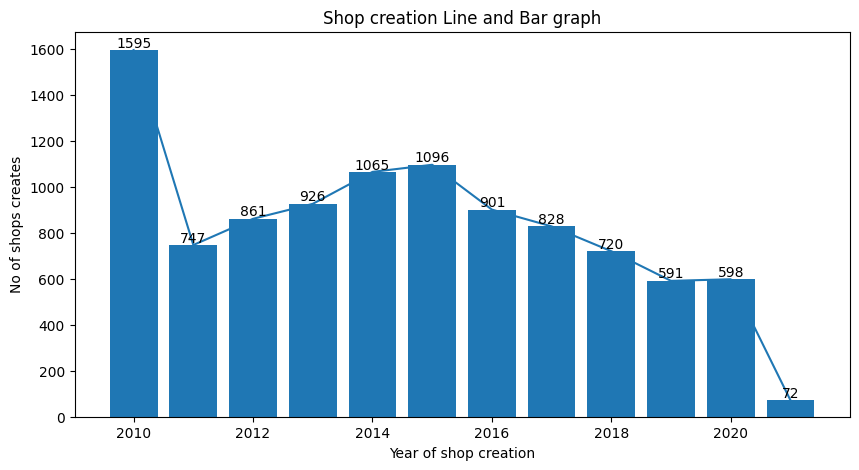

In [28]:
   import matplotlib.pyplot as plt

   x = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
   y = [1595, 747, 861, 926, 1065, 1096, 901, 828, 720, 591, 598, 72 ]

   plt.figure(figsize = (10, 5))
   plt.xlabel('Year of shop creation')
   plt.ylabel('No of shops creates')
   plt.title('Shop creation Line and Bar graph')
   plt.plot(x, y)
   plt.bar(x,y)

   for i, j in zip(x, y):
    plt.text(i, j, str(j), ha='center', va='bottom')

   plt.show()

Can you fit a relevant regression model on the dataset?

In [29]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Select the relevant columns for the regression model
data = df[['sold_count', 'total_rating_count']]

# Remove any rows with missing values
data.dropna(inplace=True)

# Define the target variable and features
target = 'sold_count'
features = ['total_rating_count']

# Add a constant column to the features
X = sm.add_constant(data[features])
y = data[target]

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression summary
print(results.summary())




                            OLS Regression Results                            
Dep. Variable:             sold_count   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                 2.274e+04
Date:                Fri, 30 Jun 2023   Prob (F-statistic):               0.00
Time:                        11:51:55   Log-Likelihood:            -1.1863e+05
No. Observations:               10000   AIC:                         2.373e+05
Df Residuals:                    9998   BIC:                         2.373e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.32e+04    435

<ipython-input-29-786735a13dd6>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

